In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec, plot_state_hinton
# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')
# Define backend
sim = Aer.get_backend('aer_simulator')

In [2]:
def createBellStates(inp1, inp2): 
    qc = QuantumCircuit(2) 
    qc.reset(range(2))
    if inp1=='1': qc.x(0)
    if inp2=='1': qc.x(1)
    
    qc.barrier()
    
    qc.h(0)
    qc.cx(0,1)
    
    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()
    
    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.



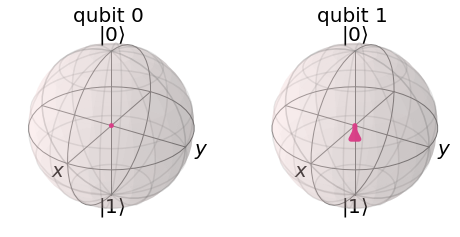

In [3]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n') 
      
inp1 = 0
inp2 = 1

qc, state, result = createBellStates(inp1, inp2)

display(plot_bloch_multivector(state))
# Uncomment below code in order to explore other states
#for inp2 in ['0', '1']:
    #for inp1 in ['0', '1']:
        #qc, state, result = createBellStates(inp1, inp2)
        #print('For inputs',inp2,inp1,'Representation of Entangled States are:')
        # Uncomment any of the below functions to visualize the resulting quantum states
        # Draw the quantum circuit
        #display(qc.draw())
        # Plot states on QSphere
        #display(plot_state_qsphere(state))
        # Plot states on Bloch Multivector
        #display(plot_bloch_multivector(state))
        # Plot histogram
        #display(plot_histogram(result.get_counts()))
        # Plot state matrix like a city
        #display(plot_state_city(state))
        # Represent state matix using Pauli operators as the basis
        #display(plot_state_paulivec(state))
        # Plot state matrix as Hinton representation
        #display(plot_state_hinton(state))
        #print('\n')'''

In [4]:
from qiskit import IBMQ, execute
from qiskit.providers.ibmq import least_busy 
from qiskit.tools import job_monitor
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
and not x.configuration().simulator and x.status().operational==True))

In [5]:
def createBSRealDevice(inp1, inp2): 
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr) 
    qc.reset(range(2))
    if inp1 == 1: 
        qc.x(0)
    if inp2 == 1: 
        qc.x(1)
    qc.barrier()
    qc.h(0)
    qc.cx(0,1)
    qc.measure(qr, cr)
    job = execute(qc, backend=backend, shots=100)
    job_monitor(job)
    result = job.result()
    return qc, result

For inputs 0 0 Representation of Entangled States are,
Job Status: job has successfully run


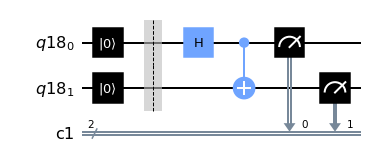

In [7]:
inp1 = 0
inp2 = 0
print('For inputs',inp2,inp1,'Representation of Entangled States are,')
#first results
qc, first_result = createBSRealDevice(inp1, inp2)
first_counts = first_result.get_counts()
# Draw the quantum circuit
display(qc.draw(output = "mpl"))

Job Status: job has successfully run


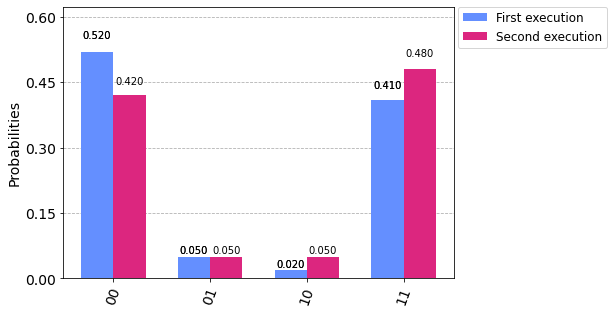

In [8]:
#second results
qc, second_result = createBSRealDevice(inp1, inp2)
second_counts = second_result.get_counts()

# Plot results on histogram with legend
legend = ['First execution', 'Second execution']
plot_histogram([first_counts, second_counts], legend=legend)

In [9]:
def ghzCircuit(inp1, inp2, inp3): 
    qc = QuantumCircuit(3)
    qc.reset(range(3))
    
    if inp1 == 1: 
        qc.x(0)
    if inp2 == 1: 
        qc.x(1)
    if inp3 == 1: 
        qc.x(2)
    
    qc.barrier()
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()
    
    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.



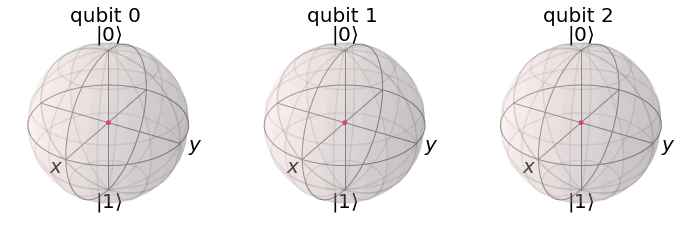

In [10]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')
inp1 = 0
inp2 = 1
inp3 = 1
qc, state, result = ghzCircuit(inp1, inp2, inp3)
display(plot_bloch_multivector(state))
# Uncomment below code in order to explore other states
#for inp3 in ['0','1']:
    #for inp2 in ['0','1']:
        #for inp1 in ['0','1']:
            #qc, state, result = ghzCircuit(inp1, inp2, inp3)
            #print('For inputs',inp3,inp2,inp1,'Representation of GHZ States are:')
            # Uncomment any of the below functions to visualize the resultingquantum states
            # Draw the quantum circuit
            #display(qc.draw())
            # Plot states on QSphere
            #display(plot_state_qsphere(state))
            # Plot states on Bloch Multivector
            #display(plot_bloch_multivector(state))
            # Plot histogram
            #display(plot_histogram(result.get_counts()))
            # Plot state matrix like a city
            #display(plot_state_city(state))
            # Represent state matix using Pauli operators as the basis
            #display(plot_state_paulivec(state))
            # Plot state matrix as Hinton representation
            #display(plot_state_hinton(state))
            #print('\n')

In [11]:
def ghz5QCircuit(inp1, inp2, inp3, inp4, inp5): 
    qc = QuantumCircuit(5)
    #qc.reset(range(5))
    if inp1 == 1: 
        qc.x(0)
    if inp2 == 1: 
        qc.x(1)
    if inp3 == 1: 
        qc.x(2)
    if inp4 == 1: 
        qc.x(3)
    if inp5 == 1: 
        qc.x(4)
        
    qc.barrier()
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.cx(0,3)
    qc.cx(0,4)
    
    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()
    
    return qc, state, result

For inputs 0 0 0 1 0 Representation of GHZ States ar e:


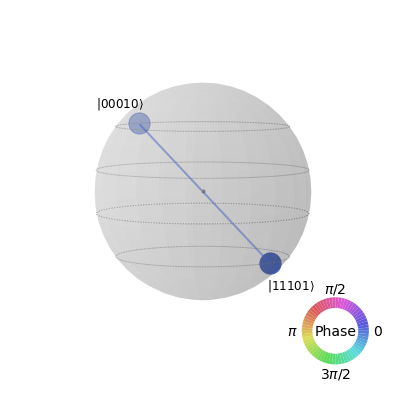

In [12]:
# Explore GHZ States for input 00010. Note: the input has been stated in littl e-endian format.
inp1 = 0
inp2 = 1
inp3 = 0
inp4 = 0
inp5 = 0
qc, state, result = ghz5QCircuit(inp1, inp2, inp3, inp4, inp5)
print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ States ar e:')
display(plot_state_qsphere(state))
print('\n')

For inputs 1 1 0 0 1 Representation of GHZ States ar e:


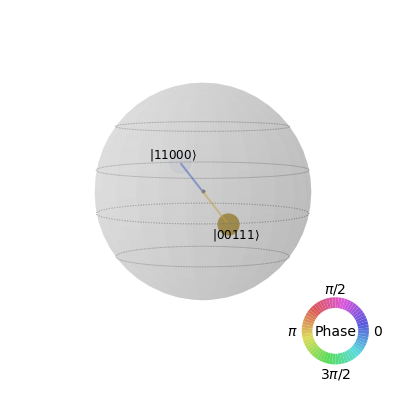



For inputs 0 1 0 1 0 Representation of GHZ States ar e:


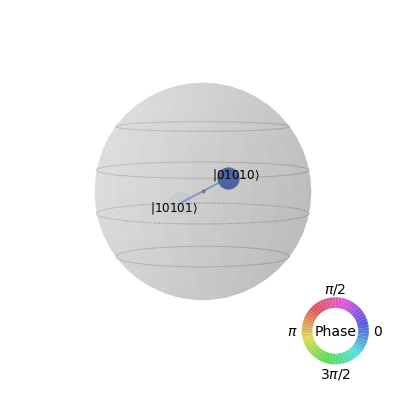

In [13]:
# Explore GHZ States for input 11001. Note: the input has been stated in littl e-endian format.
inp1 = 1
inp2 = 0
inp3 = 0
inp4 = 1
inp5 = 1
qc, state, result = ghz5QCircuit(inp1, inp2, inp3, inp4, inp5)
print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ States ar e:')
display(plot_state_qsphere(state))
print('\n')
# Explore GHZ States for input 01010. Note: the input has been stated in littl e-endian format.
inp1 = 0
inp2 = 1
inp3 = 0
inp4 = 1
inp5 = 0
qc, state, result = ghz5QCircuit(inp1, inp2, inp3, inp4, inp5)
print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ States ar e:')
display(plot_state_qsphere(state))
print('\n')
# Uncomment below code in order to explore other states
#for inp5 in ['0','1']:
    #for inp4 in ['0','1']:
        #for inp3 in ['0','1']:inp5)
#for inp2 in ['0','1']:
    #for inp1 in ['0','1']:
        #qc, state, result = ghz5QCircuit(inp1, inp2, inp3, inp4,
                    #print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ States are:')
                    # Uncomment any of the below functions to visualize the resulting quantum states
                    # Draw the quantum circuit
                    #display(qc.draw())
                    # Plot states on QSphere
                    #display(plot_state_qsphere(state))
                    # Plot states on Bloch Multivector
                    #display(plot_bloch_multivector(state))
                    # Plot histogram
                    #display(plot_histogram(result.get_counts()))
    # Plot state matrix like a city
    #display(plot_state_city(state))
    # Represent state matix using Pauli operators as the basis
    #display(plot_state_paulivec(state))
    # Plot state matrix as Hinton representation
    #display(plot_state_hinton(state))
    #print('\n')

In [14]:
#backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
provider = IBMQ.load_account()
#and not x.configuration().simulator
#and x.status().operational==True))

ibmqfactory.load_account:WARNING:2022-05-08 00:20:11,887: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
backend = provider.get_backend('ibmq_quito')

In [16]:
def create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5): 
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr, cr)
    qc.reset(range(5))
    if inp1=='1': 
        qc.x(0)
    if inp2=='1': 
        qc.x(1)
    if inp3=='1': 
        qc.x(1)
    if inp4=='1': 
        qc.x(1)
    if inp5=='1': 
        qc.x(1)
    qc.barrier()
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.cx(0,3)
    qc.cx(0,4)
    qc.measure(qr, cr)
    job = execute(qc, backend=backend, shots=1000)
    job_monitor(job)
    result = job.result()
    return qc, result

Job Status: job has successfully run


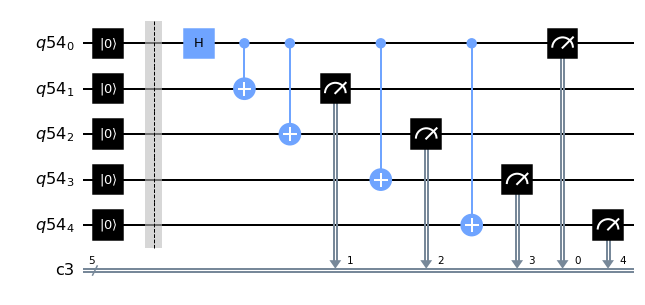

In [17]:
inp1 = 0
inp2 = 0
inp3 = 0
inp4 = 0
inp5 = 0
#first results
qc, first_result = create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5)
first_counts = first_result.get_counts()
# Draw the quantum circuit
display(qc.draw(output = 'mpl'))

Job Status: job has successfully run
For inputs 0 0 0 0 0 Representation of GHZ circuit states are,


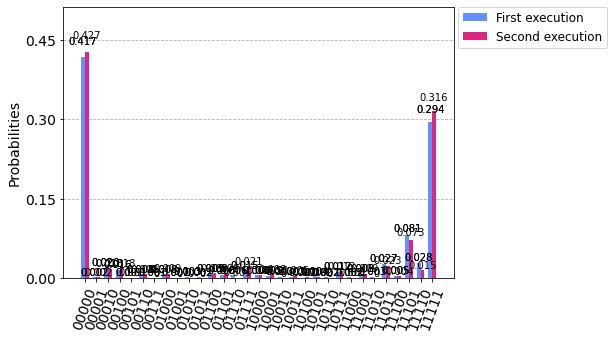

In [18]:
#second results
qc, second_result = create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5)
second_counts = second_result.get_counts()
print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ circuit states are,')
# Plot results on histogram with legend
legend = ['First execution', 'Second execution']
plot_histogram([first_counts, second_counts], legend=legend)

In [20]:
import qiskit 
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}